## Importējam pandas

`pip install pandas`

In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.4.4'

## Pandas objekti

### Series

`pd.Series` - viendimensijas marķēts masīvs, kas spēj saturēt jebkāda veida datus.

#### Inicializācija

In [3]:
# index = [0, 1, 2, 3, 4, 5] - default noteikts
data = ['a', 'b', 'c', 'd', 'e', 'f']
s = pd.Series(data) # s = pd.Series(data, index=index)
s

0    a
1    b
2    c
3    d
4    e
5    f
dtype: object

`data` šeit var būt:
1. Python dict vai list
2. ndarray (numpy masīvs)
3. skalārais lielums (skaitlis) - šajā gadījumā `index` *ir nepieciešams*. Pandas atkārto doto skalāro lielumu pie visiem indeksiem.

#### NumPy īpašības

`pd.Series` ir līdzīgs numpy masīvam. To var padod gandrīz visām numpy funkcijam.

In [4]:
s[0]

'a'

In [5]:
s[:3]

0    a
1    b
2    c
dtype: object

In [6]:
s[s != 'c'] # s > s.median() jā s vērtības ir numeriskas

0    a
1    b
3    d
4    e
5    f
dtype: object

### DataFrame

`pd.DataFrame` - Divdimensiju, izmēru mainīgi, potenciāli neviendabīgi tabulas dati.
Datu struktūrā ir arī marķētas asis (rindas un kolonnas). Darbības var veikt gan kolonās, gan rindās. Var uzskatīt par `dict` līdzīgu konteineru `pd.Series` objektiem. Primāra Pandas datu struktūra.

#### Inicializācija

In [7]:
import numpy as np

In [8]:
df2 = pd.DataFrame({
    "A" : [0, 1, 2, 3],
    "B": pd.Timestamp("20221120"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo",
})
df2

,A,B,C,D,E,F
0,0,2022-11-20,1.0,3,test,foo
1,1,2022-11-20,1.0,3,train,foo
2,2,2022-11-20,1.0,3,test,foo
3,3,2022-11-20,1.0,3,train,foo


In [9]:
df2["A"]

0    0
1    1
2    2
3    3
Name: A, dtype: int64

In [10]:
df2[0:2]

,A,B,C,D,E,F
0,0,2022-11-20,1.0,3,test,foo
1,1,2022-11-20,1.0,3,train,foo


#### Atlasīt pēc etiķētes

`pd.DataFreame.loc()` un `pd.DataFrame.at()`, lai atlasīt pēc "etiķetēm".

In [12]:
df2.loc[0]

A                      0
B    2022-11-20 00:00:00
C                    1.0
D                      3
E                   test
F                    foo
Name: 0, dtype: object

In [13]:
df2.loc[:, ["A", "B"]]

,A,B
0,0,2022-11-20
1,1,2022-11-20
2,2,2022-11-20
3,3,2022-11-20


Lai nolasīt skalāro lielumu.

In [15]:
df2.loc[0, "C"]

1.0

vai arī

In [16]:
df2.at[0, "C"]

1.0

#### Atlase pēc pozīcijas

`pd.DataFrame.iloc()` un `pd.DataFrame.iat()`

In [17]:
df2.iloc[2]

A                      2
B    2022-11-20 00:00:00
C                    1.0
D                      3
E                   test
F                    foo
Name: 2, dtype: object

In [18]:
df2.iloc[[0, 3],[1, 2]]

,B,C
0,2022-11-20,1.0
3,2022-11-20,1.0


In [22]:
df2.iloc[1, 1]

Timestamp('2022-11-20 00:00:00')

In [21]:
df2.iat[1, 1]

Timestamp('2022-11-20 00:00:00')

### Boolean indeksēšana

Lietojot vienas kolonnas vērtības.

In [25]:
df2[df2["A"] >= 2]

,A,B,C,D,E,F
2,2,2022-11-20,1.0,3,test,foo
3,3,2022-11-20,1.0,3,train,foo


### Datu mainīša

In [29]:
df2.at[0, "A"] = 6 # ar etiķeti
df2.iat[0, 2] = 7 # ar pozīciju
df2.loc[:, "D"] = np.array([35]*len(df2))
df2

,A,B,C,D,E,F
0,6,2022-11-20,7.0,35,test,foo
1,1,2022-11-20,1.0,35,train,foo
2,2,2022-11-20,1.0,35,test,foo
3,3,2022-11-20,1.0,35,train,foo


## Datu trūkšana

Pandas lieto `np.nan` tipu, lai reprezentēt trūkošus datus.

In [33]:
df3 = df2.reindex(index=[0, 1, 2, 3], columns=list(df2.columns) + ['G'])
df3.loc[1:2, 'G'] = 45
df3

,A,B,C,D,E,F,G
0,6,2022-11-20,7.0,35,test,foo,NaN
1,1,2022-11-20,1.0,35,train,foo,45.0
2,2,2022-11-20,1.0,35,test,foo,45.0
3,3,2022-11-20,1.0,35,train,foo,NaN


`pd.DataFrame.dropna()` - nomet visas rindas, kurās trūkst datu.
`pd.DataFrame.fillna()` - aizpilda trūkstošos datus.

In [34]:
df3.dropna(how="any")

,A,B,C,D,E,F,G
1,1,2022-11-20,1.0,35,train,foo,45.0
2,2,2022-11-20,1.0,35,test,foo,45.0


`pd.isna()` iegūst Boolean masku, kur vērtības ir Nan.

In [38]:
pd.isna(df3)

,A,B,C,D,E,F,G
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True


## Sapludināšana

`pd.concat()`

In [39]:
df4 = pd.DataFrame(np.random.randn(10, 4))
df4

,0,1,2,3
0,-0.447283,1.384789,-0.063153,-0.927522
1,-0.209930,-0.096015,-0.937599,-1.083406
2,-1.723681,0.688985,0.433831,0.036361
3,1.520061,-0.078560,-0.594855,0.641931
4,1.382112,-1.055073,-2.071356,-0.801706
5,-0.051652,1.502204,1.145559,-0.897427
6,0.334900,0.523530,-1.790507,-0.700380
7,0.653533,-0.359861,-1.212141,0.917137
8,-0.248704,0.813912,1.413434,-0.791541
9,-0.433151,-0.752893,0.015147,-0.379796


In [40]:
pieces = [df4[:3], df4[3:7], df4[7:]]
pieces

[          0         1         2         3
 0 -0.447283  1.384789 -0.063153 -0.927522
 1 -0.209930 -0.096015 -0.937599 -1.083406
 2 -1.723681  0.688985  0.433831  0.036361,
           0         1         2         3
 3  1.520061 -0.078560 -0.594855  0.641931
 4  1.382112 -1.055073 -2.071356 -0.801706
 5 -0.051652  1.502204  1.145559 -0.897427
 6  0.334900  0.523530 -1.790507 -0.700380,
           0         1         2         3
 7  0.653533 -0.359861 -1.212141  0.917137
 8 -0.248704  0.813912  1.413434 -0.791541
 9 -0.433151 -0.752893  0.015147 -0.379796]

In [41]:
pd.concat(pieces)

,0,1,2,3
0,-0.447283,1.384789,-0.063153,-0.927522
1,-0.209930,-0.096015,-0.937599,-1.083406
2,-1.723681,0.688985,0.433831,0.036361
3,1.520061,-0.078560,-0.594855,0.641931
4,1.382112,-1.055073,-2.071356,-0.801706
5,-0.051652,1.502204,1.145559,-0.897427
6,0.334900,0.523530,-1.790507,-0.700380
7,0.653533,-0.359861,-1.212141,0.917137
8,-0.248704,0.813912,1.413434,-0.791541
9,-0.433151,-0.752893,0.015147,-0.379796


`pd.merge` - SQL līdzīgs

In [44]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left, right

(   key  lval
 0  foo     1
 1  foo     2,
    key  rval
 0  foo     4
 1  foo     5)

In [45]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Tabulas pagriezšana

In [46]:
df3

,A,B,C,D,E,F,G
0,6,2022-11-20,7.0,35,test,foo,NaN
1,1,2022-11-20,1.0,35,train,foo,45.0
2,2,2022-11-20,1.0,35,test,foo,45.0
3,3,2022-11-20,1.0,35,train,foo,NaN


`pd.pivot_table()`- pagriež DataFrame, norādot vērtības, indeksu un kolonnas.

In [49]:
df5 = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df5

,A,B,C,D,E
0,one,A,foo,-0.411398,1.087969
1,one,B,foo,1.198349,-0.001199
2,two,C,foo,1.701842,0.099565
3,three,A,bar,0.471690,-2.047281
4,one,B,bar,0.189437,0.188792
5,one,C,bar,1.404273,-2.337913
6,two,A,foo,0.985771,-0.930050
7,three,B,foo,0.176592,0.063136
8,one,C,foo,-0.847056,-0.243030
9,one,A,bar,-0.344232,0.957352


In [50]:
pd.pivot_table(df5, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.344232 -0.411398
      B  0.189437  1.198349
      C  1.404273 -0.847056
three A  0.471690       NaN
      B       NaN  0.176592
      C -0.812230       NaN
two   A       NaN  0.985771
      B -0.817635       NaN
      C       NaN  1.701842

## Grafiki

In [51]:
import matplotlib.pyplot as plt

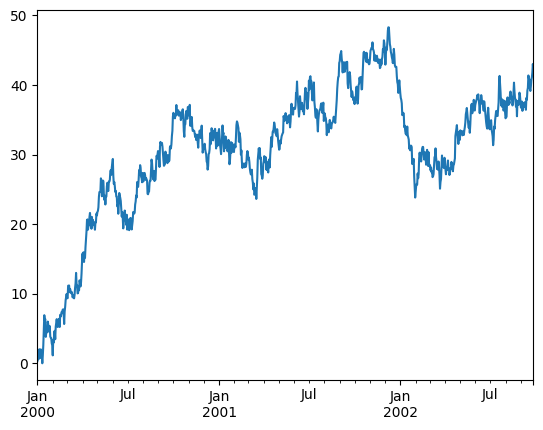

In [52]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

## Datu importēšana un eksportēšanas

Failu formati:
* CSV
* JSON
* Excel
* SQL
* [un citi](https://pandas.pydata.org/docs/user_guide/io.html)

Datu lasīšana:
`pd.read_[faila formats]()`

Datu eksportēšana:
`pd.to_[faila formats]("file_path")`